### Trying to figure out how to fit a diel sine curve to the oxygen (and chl fluor, and beam attenuation) data from CTD casts.

Trying out the following randam noisy data generator with numpy/pylab least squares sine modeling guesses at the equation parameters:

https://stackoverflow.com/questions/16716302/how-do-i-fit-a-sine-curve-to-my-data-with-pylab-and-numpy

In case of fitting a sin function, the 3 parameters to fit are:

- offset ('a')
- amplitude ('b')
- phase ('c'). 

I think that I can just look at the plotted data and make a decent guess at these (maybe not the phase shift...). I don't see why guessing a phase shift of 0 won't be fine for our purposes.

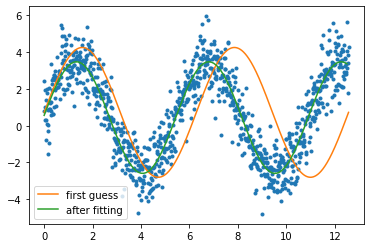

In [2]:
import numpy as np
from scipy.optimize import leastsq
import pylab as plt
import pandas as pd

N = 1000 # number of data points
t = np.linspace(0, 4*np.pi, N)
f = 1.15247 # Optional!! Advised not to use
data = 3.0*np.sin(f*t+0.001) + 0.5 + np.random.randn(N) # create artificial data with noise

guess_mean = np.mean(data)
guess_std = 3*np.std(data)/(2**0.5)/(2**0.5)
guess_phase = 0
guess_freq = 1
guess_amp = 1

# we'll use this to plot our first estimate. This might already be good enough for you
data_first_guess = guess_std*np.sin(t+guess_phase) + guess_mean

# Define the function to optimize, in this case, we want to minimize the difference
# between the actual data and our "guessed" parameters
optimize_func = lambda x: x[0]*np.sin(x[1]*t+x[2]) + x[3] - data
est_amp, est_freq, est_phase, est_mean = leastsq(optimize_func, [guess_amp, guess_freq, guess_phase, guess_mean])[0]

# recreate the fitted curve using the optimized parameters
data_fit = est_amp*np.sin(est_freq*t+est_phase) + est_mean

# recreate the fitted curve using the optimized parameters

fine_t = np.arange(0,max(t),0.1)
data_fit=est_amp*np.sin(est_freq*fine_t+est_phase)+est_mean

plt.plot(t, data, '.')
plt.plot(t, data_first_guess, label='first guess')
plt.plot(fine_t, data_fit, label='after fitting')
plt.legend()
plt.show()

### Ok, now trying to use some real, example DO data from Puerto Rico

Found here on ScienceBase: https://www.sciencebase.gov/catalog/item/get/5a200f37e4b09fc93ddb2023?files.sort=name&files.order=asc&files.metadataFirst=false#attached-files-section

In [3]:
cd ~/Documents/git-repos/2017-etnp/analyses/flux/

/home/millieginty/Documents/git-repos/2017-etnp/analyses/flux


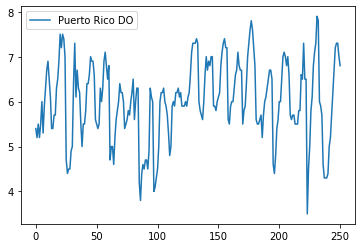

In [4]:
df = pd.read_csv('DO.csv')

pr_data = df

plt.plot(pr_data, label='Puerto Rico DO')

plt.legend()
plt.show()

In [9]:
## Guess at the phase shift, frequenqy, amplitide of the PR DO data:

N = 1 # number of data points. We have 250 now instead of 1000
t = np.linspace(0, 4*np.pi, N)


guess_mean = np.mean(pr_data)
guess_std = 3*np.std(pr_data)/(2**0.5)/(2**0.5)
guess_phase = 0
guess_freq = 4
guess_amp = 1

# we'll use this to plot our first estimate. 
data_first_guess = guess_std*np.sin(t+guess_phase) + guess_mean

# Define the function to optimize, in this case, we want to minimize the difference
# between the actual data and our "guessed" parameters
optimize_func = lambda x: x[0]*np.sin(x[1]*t+x[2]) + x[3] - pr_data
est_amp, est_freq, est_phase, est_mean = leastsq(optimize_func, [guess_amp, guess_freq, guess_phase, guess_mean])[0]

TypeError: Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe'

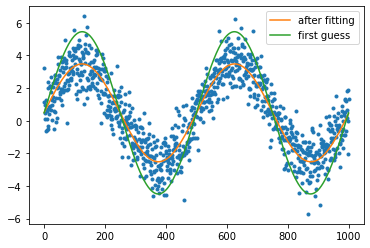

In [11]:
## Another try without setting frequency but using artifical data

import numpy as np
from scipy.optimize import curve_fit
import pylab as plt

N = 1000 # number of data points
t = np.linspace(0, 4*np.pi, N)
data = 3.0*np.sin(t+0.001) + 0.5 + np.random.randn(N) # create artificial data with noise

guess_freq = 1
guess_amplitude = 3*np.std(data)/(2**0.5)
guess_phase = 0
guess_offset = np.mean(data)

p0=[guess_freq, guess_amplitude,
    guess_phase, guess_offset]

# create the function we want to fit
def my_sin(x, freq, amplitude, phase, offset):
    return np.sin(x * freq + phase) * amplitude + offset

# now do the fit
fit = curve_fit(my_sin, t, data, p0=p0)

# we'll use this to plot our first estimate. This might already be good enough for you
data_first_guess = my_sin(t, *p0)

# recreate the fitted curve using the optimized parameters
data_fit = my_sin(t, *fit[0])

plt.plot(data, '.')
plt.plot(data_fit, label='after fitting')
plt.plot(data_first_guess, label='first guess')
plt.legend()
plt.show()

[1.50132088e+04 5.00657882e-04 2.30072610e+04]


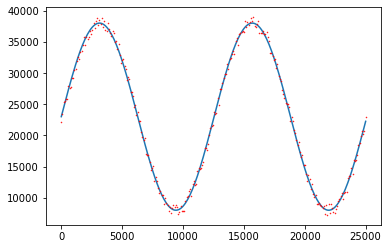

In [13]:
from scipy.optimize import curve_fit as cf

# simulate your data
xdata = np.linspace(0, 25000, 256)
ydata = 15000 * np.sin(xdata/2000) + 22000

# add some noise
ydata += np.random.rand(xdata.size) * 2000

# sin function needs a y-offset -> c
def sin_fun(x,a,b,c):
    return a*np.sin(b*x)+c

# need a reasonable guess -> note that the guess is not quite right but curve_fit still works
p_opt,p_cov=cf(sin_fun,xdata,ydata, p0=(10000, 1/2500, 15000))
print(p_opt)

plt.plot(xdata,sin_fun(xdata,*p_opt))
plt.plot(xdata,ydata, 'r.', ms=1)
plt.show();